## 2. Logistic Regression

- Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.
- Linear regression predictions are continuous values (i.e., rainfall in cm), logistic regression predictions are discrete values (i.e., whether a student passed/failed) after applying a transformation function.
    - Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function.
    - The hypothesis of logistic regression tends it to limit the cost function between 0 and 1.
    
    $0<= h_{\theta}(x)<=1$

### Sigmoid function
- The function maps any real value into another value between 0 and 1, we use sigmoid to map predictions to probabilities.
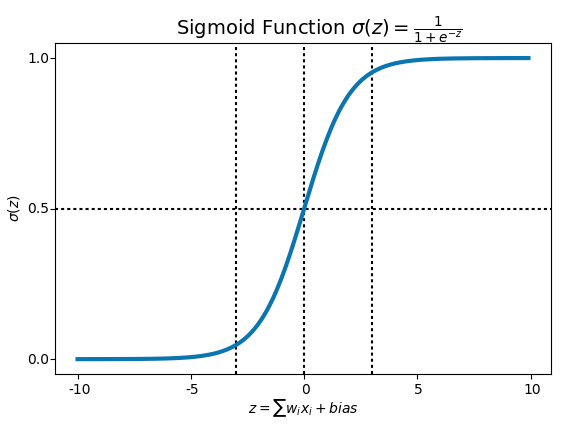

### Decision Boundary

- We expect our classifier to give us a set of outputs or classes based on probability when we pass the inputs through a prediction function and returns a probability score between 0 and 1.

=> The threshold then we classify. For instance, we decide if the probability from Sigmoid function > 0.5 then the output values = 1(or class 1), and opposite is 0 (or class 0)

### Code examples

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
train = pd.read_csv('data/titanic-disaster/titanic_train.csv')
test = pd.read_csv('data/titanic-disaster/titanic_test.csv')

In [28]:
train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [29]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


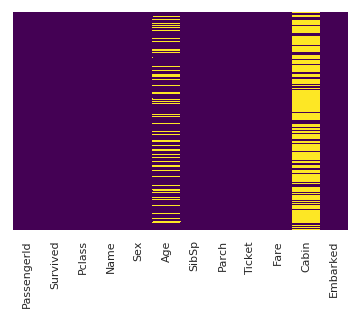

In [32]:
# see where we are missing data!
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')
# The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. 
# The Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level.

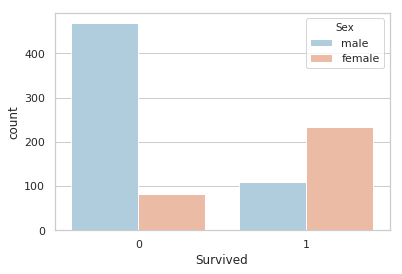

In [34]:
#count-plot of people survided 
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

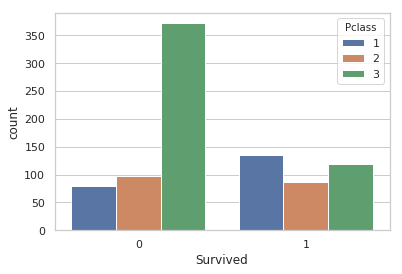

In [35]:
#no. of people who survived according to their Passenger Class
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=train)

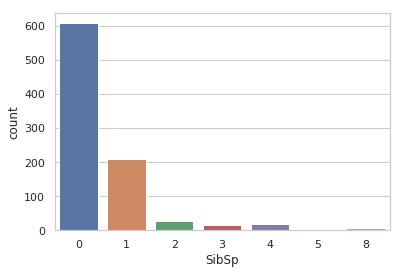

In [36]:
#countplot of the people having siblings or spouce
sns.countplot(x='SibSp',data=train)

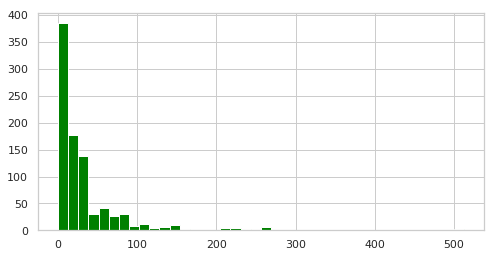

In [37]:
#distribution plot of the ticket fare
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

#### Data Cleaning

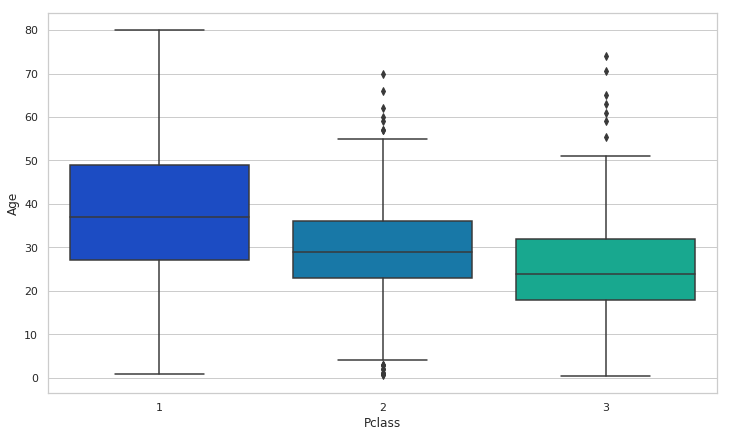

In [38]:
#boxplot with age on y-axis and Passenger class on x-axis.
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [41]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
                    return 37
        elif Pclass == 2:
                    return 29
        else:
                    return 24
    else:
            return Age

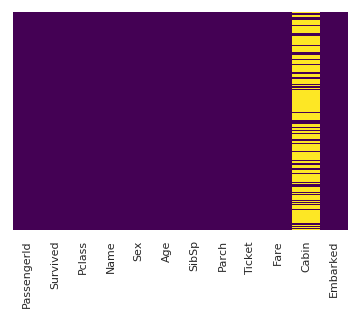

In [43]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [45]:
train.drop('Cabin',axis=1,inplace=True)
train.dropna(inplace=True)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


#### Converting Categorical Features

In [46]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)
#drop the sex,embarked,name and tickets columns
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
#concatenate new sex and embark column to our train dataframe
train = pd.concat([train,sex,embark],axis=1)
#check the head of dataframe
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
           train['Survived'], test_size=0.30, 
            random_state=101)

In [48]:
from sklearn.linear_model import LogisticRegression
#create an instance and fit the model 
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/home/thanhtinh/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
#predictions
predictions = logmodel.predict(X_test)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [55]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predictions))

[[151  12]
 [ 36  68]]


From our confusion matrix we conclude that:
- True positive: 148(We predicted a positive result and it was positive)
- True negative: 68(We predicted a negative result and it was negative)
- False positive: 15(We predicted a positive result and it was negative)
- False negative: 36(We predicted a negative result and it was positive)

Accuracy = (TP+TN)/total

Accuracy = (148+68)/267 ~ 81%

Error Rate = (FP+FN)/total

Error rate = (36+15)/267 ~19%